<a href="https://colab.research.google.com/github/eco-abhi/Pytorch/blob/main/Pytorch_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Number of data points
N = 20

# Random data on the x-axis in (-5, +5)
X = np.random.random(N) * 10 - 5

# A line plus some noise
Y = X * 0.5 - 1 + np.random.randn(N)


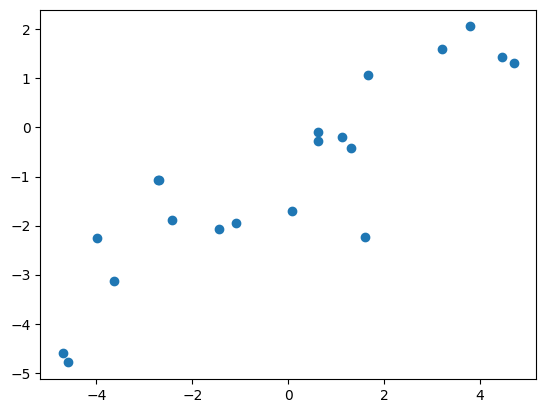

In [28]:
plt.scatter(X, Y)
plt.show()

In [29]:
# Create the Linear Regression Model
model = nn.Linear(1, 1)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Reshaping the data
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# Pytorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [30]:
type(inputs)

torch.Tensor

In [31]:
# Train the model
n_epochs = 90
losses = []

# Training loop
for epoch in range(n_epochs):

    # Clear the gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)  # MSE loss

    # Store the loss for plotting
    losses.append(loss.item())

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Print the loss every 10 epochs
    if (epoch + 1) % 2 == 0:
        print(f"Epoch [{epoch + 1}/{n_epochs}], Loss: {loss.item():.4f}")




Epoch [2/90], Loss: 11.1039
Epoch [4/90], Loss: 7.1040
Epoch [6/90], Loss: 5.1102
Epoch [8/90], Loss: 4.0689
Epoch [10/90], Loss: 3.4838
Epoch [12/90], Loss: 3.1207
Epoch [14/90], Loss: 2.8688
Epoch [16/90], Loss: 2.6756
Epoch [18/90], Loss: 2.5156
Epoch [20/90], Loss: 2.3767
Epoch [22/90], Loss: 2.2526
Epoch [24/90], Loss: 2.1400
Epoch [26/90], Loss: 2.0370
Epoch [28/90], Loss: 1.9424
Epoch [30/90], Loss: 1.8553
Epoch [32/90], Loss: 1.7750
Epoch [34/90], Loss: 1.7009
Epoch [36/90], Loss: 1.6326
Epoch [38/90], Loss: 1.5696
Epoch [40/90], Loss: 1.5114
Epoch [42/90], Loss: 1.4577
Epoch [44/90], Loss: 1.4082
Epoch [46/90], Loss: 1.3625
Epoch [48/90], Loss: 1.3203
Epoch [50/90], Loss: 1.2814
Epoch [52/90], Loss: 1.2455
Epoch [54/90], Loss: 1.2124
Epoch [56/90], Loss: 1.1818
Epoch [58/90], Loss: 1.1536
Epoch [60/90], Loss: 1.1275
Epoch [62/90], Loss: 1.1035
Epoch [64/90], Loss: 1.0813
Epoch [66/90], Loss: 1.0609
Epoch [68/90], Loss: 1.0420
Epoch [70/90], Loss: 1.0246
Epoch [72/90], Loss: 1.

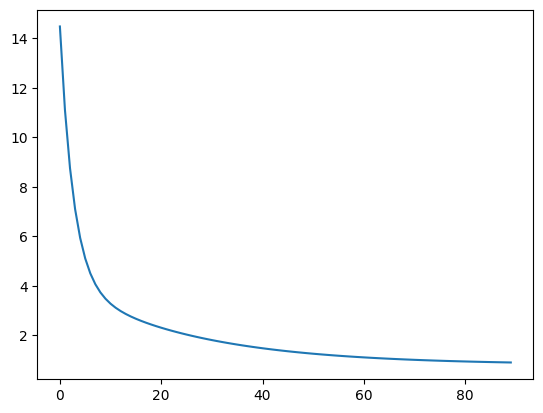

In [32]:
plt.plot(losses)

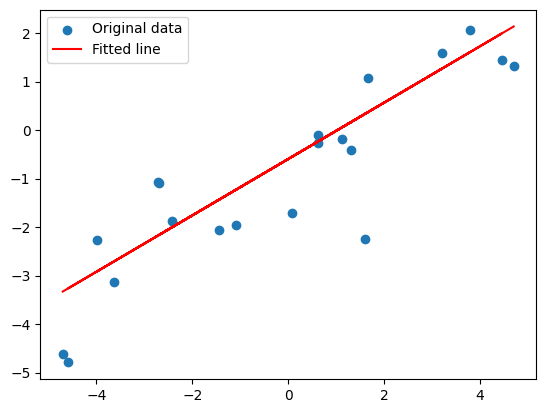

In [33]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label="Original data")
plt.plot(X, predicted, color='red', label="Fitted line")
plt.legend()
plt.show()

In [34]:
# Another way

with torch.no_grad():
    out = model(inputs).numpy()
out

array([[ 2.1381958 ],
       [-1.4291861 ],
       [-2.706705  ],
       [-3.260784  ],
       [-1.2335196 ],
       [ 0.37217098],
       [-2.1656861 ],
       [ 1.2680368 ],
       [ 0.05801278],
       [ 1.9913869 ],
       [-0.23922077],
       [ 0.33782315],
       [ 0.16488463],
       [-2.0041497 ],
       [-2.173199  ],
       [ 1.6064951 ],
       [-0.5521355 ],
       [-2.912917  ],
       [-0.23256007],
       [-3.327267  ]], dtype=float32)

In [38]:
# True values of w and b are

w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.58125454]] [-0.5953036]
